In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [54]:
path_jeu = 'C:/Users/THINKPad/Desktop/ProjetInter/PIP_2022NA/DATA1/DONNEES_CONCAT_TLSE-LD/'
data=pd.read_csv(path_jeu+'donnee_v2_ech_train_transfo.csv',nrows = 100000)

In [38]:
data_acp=pd.read_csv(path_jeu+'résultat_acp.csv',nrows = 100000,sep = ";")
data_acp

,0,1,2,3,4
0,-11.255207,-1.138247,1.081940,0.663034,0.105620
1,8.889653,-4.514900,-2.616306,1.655180,4.934510
2,-0.055419,-2.454123,0.547287,1.549708,0.935755
3,8.000521,-3.703128,4.711690,-0.477167,4.307042
4,12.546723,-3.119479,0.542090,-1.223746,4.780753
...,...,...,...,...,...
99995,4.863329,-2.928060,4.525705,-1.818693,2.757695
99996,7.450711,-3.509428,-2.896355,-0.431942,-0.150791
99997,-2.196309,-2.927835,1.946286,-1.344643,-1.710822
99998,-4.106725,0.357864,0.081933,-0.664846,2.866438


In [10]:
data

,Unnamed: 0,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,...,EPARGNE_LOGEMENT_ECART_M6_pos,EPARGNE_LOGEMENT_ECART_M6_neg,MONETAIRE_DISPONIBLE_pos,MONETAIRE_DISPONIBLE_neg,mt_reduc_ttc_M_pos,mt_reduc_ttc_M_neg,MONETAIRE_DISPONIBLE_M6_pos,MONETAIRE_DISPONIBLE_M6_neg,MONETAIRE_DISPONIBLE_ECART_M6_pos,MONETAIRE_DISPONIBLE_ECART_M6_neg
0,0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0,0.000000,0,0,0,0.000000,0,0.000000,0
1,1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,1.0,1.0,1.0,0.0,1.0,...,0.0,0,4.043051,0,0,0,4.043051,0,0.000000,0
2,2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0.0,0,7.170888,0,0,0,7.170888,0,0.000000,0
3,3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0.0,0,7.496097,0,0,0,6.154858,0,7.170888,0
4,4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0.0,0,9.642188,0,0,0,9.433564,0,7.937732,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,831erKg81TJmAbQnOX9rZoOdQ==,0,0,0,0.0,1.0,0.0,0.0,1.0,...,0.0,0,7.244942,0,0,0,6.447306,0,6.594413,0
99996,99996,831louKafLU79j3WrH2bjeLNQ==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0.0,0,8.343078,0,0,0,8.630700,0,0.000000,1
99997,99997,831hXRenvv3ks9lbcgPvEi74g==,0,0,0,1.0,1.0,1.0,0.0,1.0,...,0.0,0,0.000000,0,0,0,0.000000,0,0.000000,0
99998,99998,8315h61I1AY+wufeyy6441okw==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0.0,0,0.000000,0,0,0,0.000000,0,0.000000,0


In [53]:
colonnes = ['SECTEUR_GESTION_CTRE AFFAIRE OUEST LANGUEDOC',
 'nb_op_debit_ep_a_terme_M6',
 'type_residence_1_Usufruitier',
 'top_credit_HABITAT',
 'nouveau_societaire_M',
 'top_credit_CONSO',
 'INDICMAILING_COURRIER_OPTOUT',
 'NB_JR_WEB_6M',
 'type_residence_1_Autre',
 'INDICMAILING_COURRIER_OPTIN',
 'EMPRUNTS_M6',
 'NB_VEL_PACIFICA_6M',
 'mt_oblig_cnca',
 'NB_DEPOSE_PACIFICA_WEB_6M',
 'qt_oblig_cnca',
 'NB_PAIMT_PAYLIB_6M',
 'ENCOURS_REVOLVING',
 'mt_prlv_impaye',
 'top_produit_epargne_logement',
 'SURFACE_FINANCIERE_M6_neg',
 'top_real_pret_3M',
 'MONETAIRE_BLOQUE_ECART_M6_neg',
 'qt_oblig_tiers',
 'MNTPAIEMENTS_6M',
 'mt_rist_ttc_M',
 'NB_DEVIS_PACIFICA_AG_6M',
 'NBJ_CNT_APPELENTRANTS_6M',
 'TOT_TLCHGMTEDOC_WEB_6M',
 'SECTEUR_GESTION_RISQUES',
 'mt_ret_carte_CRCA_M6',
 'nb_ret_carte_etr_M6',
 'mt_oblig',
 'TOT_MODIF_PARAM_CARTE_WEB_6M',
 'FIAB_TEL_PORTABLE',
 'NB_RDV_MBANQUE_6M',
 'SECTEUR_GESTION_SECTEUR MONTPELLIER CENTRE UNIV',
 'NBPAIEMENTS_WEB_6M',
 'ENCOURS_CREDIT',
 'ENCOURS_DAV_ECART_M6_neg',
 'mt_op_debit_ep_a_terme_M',
 'MONETAIRE_BLOQUE_pos',
 'top_produit_Cartes',
 'SECTEUR_GESTION_SECTEUR COSTIERES VIDOURLE',
 'INDICPOR_POR_NEUTRE',
 'top_GERANT',
 'nb_retrait_carte_M6',
 'MONETAIRE_DISPONIBLE_M6_neg',
 'TOT_CCOMPTE_WEB_6M',
 'nb_ret_carte_etr_M']

In [4]:
df = data[colonnes]

In [5]:
df_normalize = pd.DataFrame(preprocessing.normalize(df),columns=df.columns)
df_normalize

,SECTEUR_GESTION_CTRE AFFAIRE OUEST LANGUEDOC,nb_op_debit_ep_a_terme_M6,type_residence_1_Usufruitier,top_credit_HABITAT,nouveau_societaire_M,top_credit_CONSO,INDICMAILING_COURRIER_OPTOUT,NB_JR_WEB_6M,type_residence_1_Autre,INDICMAILING_COURRIER_OPTIN,...,mt_op_debit_ep_a_terme_M,MONETAIRE_BLOQUE_pos,top_produit_Cartes,SECTEUR_GESTION_SECTEUR COSTIERES VIDOURLE,INDICPOR_POR_NEUTRE,top_GERANT,nb_retrait_carte_M6,MONETAIRE_DISPONIBLE_M6_neg,TOT_CCOMPTE_WEB_6M,nb_ret_carte_etr_M
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.707107,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.065206,0.0,0.000000,0.0,0.065206,...,0.0,0.0,0.065206,0.0,0.0,0.0,0.090395,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.102843,...,0.0,0.0,0.102843,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.068988,0.0,0.186822,0.0,0.068988,...,0.0,0.0,0.068988,0.0,0.0,0.0,0.000000,0.0,0.186822,0.0
4,0.0,0.0,0.0,0.058817,0.0,0.058817,0.0,0.105385,0.0,0.058817,...,0.0,0.0,0.058817,0.0,0.0,0.0,0.064617,0.0,0.105385,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.064040,0.0,0.064040,0.0,0.188562,0.0,0.064040,...,0.0,0.0,0.064040,0.0,0.0,0.0,0.000000,0.0,0.188562,0.0
99996,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.132401,0.0,0.095507,...,0.0,0.0,0.095507,0.0,0.0,0.0,0.153712,0.0,0.132401,0.0
99997,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.302724,0.0,0.118023,...,0.0,0.0,0.118023,0.0,0.0,0.0,0.000000,0.0,0.302724,0.0
99998,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.500000,...,0.0,0.0,0.500000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [ ]:
def evaluation3( score: np.ndarray, y: np.ndarray, percentage: float, display=True):
    """Evaluation with threshold

    Args:
        score (np.ndarray): Score for each individual, hight value => outlayer, low value => normal
        y (np.ndarray): True TOP_FRAUDE
        percentage (float): Threshold over 100 (example: 2%)
        display (bool, optional): display precision, recall, f1_score. Defaults to True.

    Returns:
        tp, fp, fn, tp
    """
    pred = score > sorted(score, key=lambda x: -x)[int(percentage / 100 * len(score))]

    confusion_mat = confusion_matrix(y, pred)

    tn, fp, fn, tp = confusion_mat.ravel()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)

    if display:
        print("TN / FP \nFN / TP")
        print(confusion_mat)
        print(f"Precision : {precision}")
        print(f"Recall : {recall}")
        print(f"F1_Score : {f1_score}")

    return tn, fp, fn, tp


In [14]:
def evaluation(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        plt.plot(recall, precision)
        plt.show()
    
    return value, f1_score, precision, recall

# KNN

In [ ]:
from pyod.models.knn import KNN  


clf_name = 'kNN'
clf = KNN()
clf.fit(df_normalize) 


In [ ]:
score_pred = clf.decision_scores_*-1
score_pred

In [ ]:
y_pred = clf.predict(df_normalize)
y_pred

# IFOREST

In [7]:
from pyod.models.iforest import IForest

In [8]:
    clf_name = 'IForest'
    clf = IForest()
    clf.fit(df_normalize)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [9]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

In [12]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix



In [13]:
evaluation3(y_scores,data['TOP_FRAUDE'],2)

TN / FP 
FN / TP
[[97855  1996]
 [  145     4]]
Precision : 0.002
Recall : 0.026845637583892617
F1_Score : 0.0037226617031177298


(97855, 1996, 145, 4)

<ipython-input-14-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


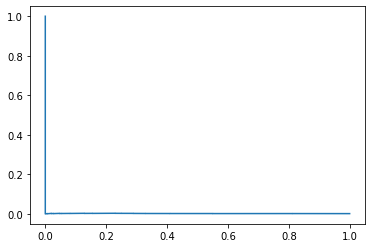

Air sous la courbe :  0.0020444877261209904


In [15]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)  

# PCA

In [17]:
from pyod.models.pca import PCA
clf = PCA(contamination=0.002)
clf.fit(df_normalize)

PCA(contamination=0.002, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [18]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

In [19]:
evaluation3(y_scores,data['TOP_FRAUDE'],2)

TN / FP 
FN / TP
[[97853  1998]
 [  147     2]]
Precision : 0.001
Recall : 0.013422818791946308
F1_Score : 0.0018613308515588649


(97853, 1998, 147, 2)

<ipython-input-14-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


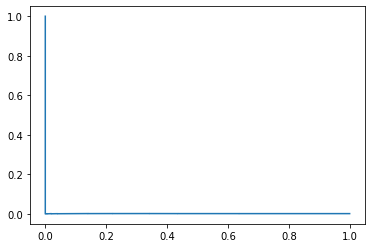

Air sous la courbe :  0.0015630395207651485


In [20]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)  

In [22]:
colonnes10 = ['SECTEUR_GESTION_CTRE AFFAIRE OUEST LANGUEDOC',
 'nb_op_debit_ep_a_terme_M6',
 'type_residence_1_Usufruitier',
 'top_credit_HABITAT',
 'nouveau_societaire_M',
 'top_credit_CONSO',
 'INDICMAILING_COURRIER_OPTOUT',
 'NB_JR_WEB_6M',
 'type_residence_1_Autre',
 'INDICMAILING_COURRIER_OPTIN']

In [25]:
df10 = df_normalize[colonnes10]
df10

,SECTEUR_GESTION_CTRE AFFAIRE OUEST LANGUEDOC,nb_op_debit_ep_a_terme_M6,type_residence_1_Usufruitier,top_credit_HABITAT,nouveau_societaire_M,top_credit_CONSO,INDICMAILING_COURRIER_OPTOUT,NB_JR_WEB_6M,type_residence_1_Autre,INDICMAILING_COURRIER_OPTIN
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.707107
1,0.0,0.0,0.0,0.000000,0.0,0.065206,0.0,0.000000,0.0,0.065206
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.102843
3,0.0,0.0,0.0,0.000000,0.0,0.068988,0.0,0.186822,0.0,0.068988
4,0.0,0.0,0.0,0.058817,0.0,0.058817,0.0,0.105385,0.0,0.058817
...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.064040,0.0,0.064040,0.0,0.188562,0.0,0.064040
99996,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.132401,0.0,0.095507
99997,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.302724,0.0,0.118023
99998,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.500000


# IForest-10

In [26]:
    clf_name = 'IForest'
    clf = IForest()
    clf.fit(df10)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [27]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

In [28]:
evaluation3(y_scores,data['TOP_FRAUDE'],2)

TN / FP 
FN / TP
[[97855  1996]
 [  145     4]]
Precision : 0.002
Recall : 0.026845637583892617
F1_Score : 0.0037226617031177298


(97855, 1996, 145, 4)

<ipython-input-14-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


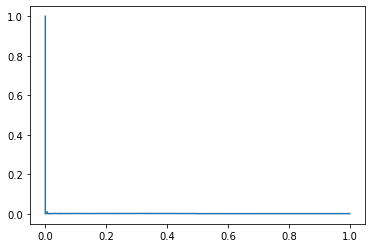

Air sous la courbe :  0.0018457223260806093


In [29]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

# PCA

In [30]:
clf = PCA(contamination=0.002)
clf.fit(df10)

C:\Python\lib\site-packages\pyod\models\pca.py:269: RuntimeWarning: divide by zero encountered in true_divide
  cdist(X, self.selected_components_) / self.selected_w_components_,
C:\Python\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Python\lib\site-packages\numpy\core\_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


PCA(contamination=0.002, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [31]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

In [32]:
evaluation3(y_scores,data['TOP_FRAUDE'],2)

TN / FP 
FN / TP
[[99851     0]
 [  149     0]]
Precision : nan
Recall : 0.0
F1_Score : nan


<ipython-input-6-2c33566eaa1e>:19: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)


(99851, 0, 149, 0)

# IFOREST-ACP 

In [40]:
    clf_name = 'IForest'
    clf = IForest()
    clf.fit(data_acp)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [41]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

In [42]:
evaluation3(y_scores,data['TOP_FRAUDE'],2)

TN / FP 
FN / TP
[[97859  1992]
 [  141     8]]
Precision : 0.004
Recall : 0.053691275167785234
F1_Score : 0.0074453234062354596


(97859, 1992, 141, 8)

<ipython-input-14-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


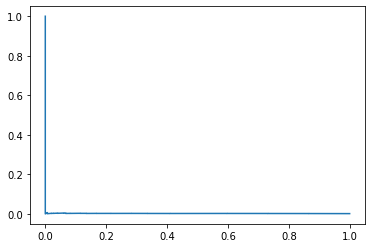

Air sous la courbe :  0.002329108478824758


In [43]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

# PCA

In [44]:
clf = PCA(contamination=0.002)
clf.fit(data_acp)

PCA(contamination=0.002, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [45]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

In [46]:
evaluation3(y_scores,data['TOP_FRAUDE'],2)

TN / FP 
FN / TP
[[97858  1993]
 [  142     7]]
Precision : 0.0035
Recall : 0.04697986577181208
F1_Score : 0.0065146579804560255


(97858, 1993, 142, 7)

<ipython-input-14-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


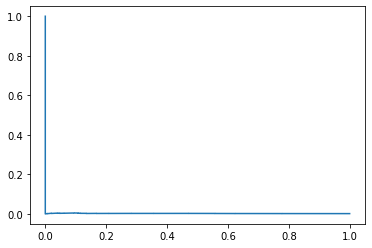

Air sous la courbe :  0.0023156539789394846


In [47]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

# Variables choisies V2

In [48]:
colonnes = ['nb_ouv_prod_6M', 
 "SECTEUR_GESTION_CENTRE D'AFFAIRES EST LANGUEDOC", 
 'seg_nature_potentiel_PATRI DYNAMIQUE',
 'seg_nature_potentiel_PATRI FORTUNE', 
 'Client_2', 
 'seg_nature_potentiel_INT DYNAMIQUE', 
 'seg_nature_potentiel_PATRI TRADITIONNEL', 
 'seg_nature_potentiel_INT TRADITIONNEL', 
 'Tranche_age_1_76-85',
 'Tranche_age_1_66-75']

In [55]:
dfv2 = data[colonnes]
dfv2

,SECTEUR_GESTION_CTRE AFFAIRE OUEST LANGUEDOC,nb_op_debit_ep_a_terme_M6,type_residence_1_Usufruitier,top_credit_HABITAT,nouveau_societaire_M,top_credit_CONSO,INDICMAILING_COURRIER_OPTOUT,NB_JR_WEB_6M,type_residence_1_Autre,INDICMAILING_COURRIER_OPTIN,...,mt_op_debit_ep_a_terme_M,MONETAIRE_BLOQUE_pos,top_produit_Cartes,SECTEUR_GESTION_SECTEUR COSTIERES VIDOURLE,INDICPOR_POR_NEUTRE,top_GERANT,nb_retrait_carte_M6,MONETAIRE_DISPONIBLE_M6_neg,TOT_CCOMPTE_WEB_6M,nb_ret_carte_etr_M
0,0,0,0,0.0,0.0,0.0,0,0.000000,0,1,...,0,0.0,0.0,0,0,0.0,0.000000,0,0.000000,0
1,0,0,0,0.0,0.0,1.0,0,0.000000,0,1,...,0,0.0,1.0,0,0,0.0,1.386294,0,0.000000,0
2,0,0,0,0.0,0.0,0.0,0,0.000000,0,1,...,0,0.0,1.0,0,0,0.0,0.000000,0,0.000000,0
3,0,0,0,0.0,0.0,1.0,0,2.708050,0,1,...,0,0.0,1.0,0,0,0.0,0.000000,0,2.708050,0
4,0,0,0,1.0,0.0,1.0,0,1.791759,0,1,...,0,0.0,1.0,0,0,0.0,1.098612,0,1.791759,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,1.0,0.0,1.0,0,2.944439,0,1,...,0,0.0,1.0,0,0,0.0,0.000000,0,2.944439,0
99996,0,0,0,0.0,0.0,0.0,0,1.386294,0,1,...,0,0.0,1.0,0,0,0.0,1.609438,0,1.386294,0
99997,0,0,0,0.0,0.0,0.0,0,2.564949,0,1,...,0,0.0,1.0,0,0,0.0,0.000000,0,2.564949,0
99998,0,0,0,0.0,0.0,0.0,0,0.000000,0,1,...,0,0.0,1.0,0,0,0.0,0.000000,0,0.000000,0


In [56]:
dfv2_normalize = pd.DataFrame(preprocessing.normalize(dfv2),columns=dfv2.columns)
dfv2_normalize

,SECTEUR_GESTION_CTRE AFFAIRE OUEST LANGUEDOC,nb_op_debit_ep_a_terme_M6,type_residence_1_Usufruitier,top_credit_HABITAT,nouveau_societaire_M,top_credit_CONSO,INDICMAILING_COURRIER_OPTOUT,NB_JR_WEB_6M,type_residence_1_Autre,INDICMAILING_COURRIER_OPTIN,...,mt_op_debit_ep_a_terme_M,MONETAIRE_BLOQUE_pos,top_produit_Cartes,SECTEUR_GESTION_SECTEUR COSTIERES VIDOURLE,INDICPOR_POR_NEUTRE,top_GERANT,nb_retrait_carte_M6,MONETAIRE_DISPONIBLE_M6_neg,TOT_CCOMPTE_WEB_6M,nb_ret_carte_etr_M
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.707107,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.065206,0.0,0.000000,0.0,0.065206,...,0.0,0.0,0.065206,0.0,0.0,0.0,0.090395,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.102843,...,0.0,0.0,0.102843,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.068988,0.0,0.186822,0.0,0.068988,...,0.0,0.0,0.068988,0.0,0.0,0.0,0.000000,0.0,0.186822,0.0
4,0.0,0.0,0.0,0.058817,0.0,0.058817,0.0,0.105385,0.0,0.058817,...,0.0,0.0,0.058817,0.0,0.0,0.0,0.064617,0.0,0.105385,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.064040,0.0,0.064040,0.0,0.188562,0.0,0.064040,...,0.0,0.0,0.064040,0.0,0.0,0.0,0.000000,0.0,0.188562,0.0
99996,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.132401,0.0,0.095507,...,0.0,0.0,0.095507,0.0,0.0,0.0,0.153712,0.0,0.132401,0.0
99997,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.302724,0.0,0.118023,...,0.0,0.0,0.118023,0.0,0.0,0.0,0.000000,0.0,0.302724,0.0
99998,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.500000,...,0.0,0.0,0.500000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [57]:
clf = PCA(contamination=0.002)
clf.fit(dfv2_normalize)

PCA(contamination=0.002, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [58]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

In [59]:
evaluation3(y_scores,data['TOP_FRAUDE'],2)

TN / FP 
FN / TP
[[97853  1998]
 [  147     2]]
Precision : 0.001
Recall : 0.013422818791946308
F1_Score : 0.0018613308515588649


(97853, 1998, 147, 2)

<ipython-input-14-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


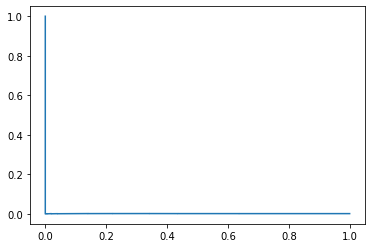

Air sous la courbe :  0.0015630395207651485


In [60]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)